<a href="https://colab.research.google.com/github/Suthakaran12/PRODIGY_DS_01/blob/main/PRODIGY_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**installing shiz**

In [ ]:
!pip install plotly
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


**load from url into a dataframe**

In [ ]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)


**data preprocessing - displaying, checking null values, converting data types, removing duplicates, filling empty data point features.**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Fill missing age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop rows where 'Embarked' is missing
df.dropna(subset=['Embarked'], inplace=True)

# Fill missing 'Cabin' values with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**visualizing and analyzing through histogram n all**

In [ ]:
# Bar chart for gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

# Histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


NameError: name 'plt' is not defined

**discrete and continuous relation between features to visualize and analyze**

In [ ]:
# Survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='blue', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

**more relation by combining features and cross analyzing.**

In [ ]:
# Survival rate by gender and passenger class
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count', height=5, aspect=1)
plt.suptitle('Survival Rate by Gender and Passenger Class')
plt.show()

# Age distribution by passenger class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Fare distribution by survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

**correlating features to identify relationships, selecting features, and understanding features as a whole**

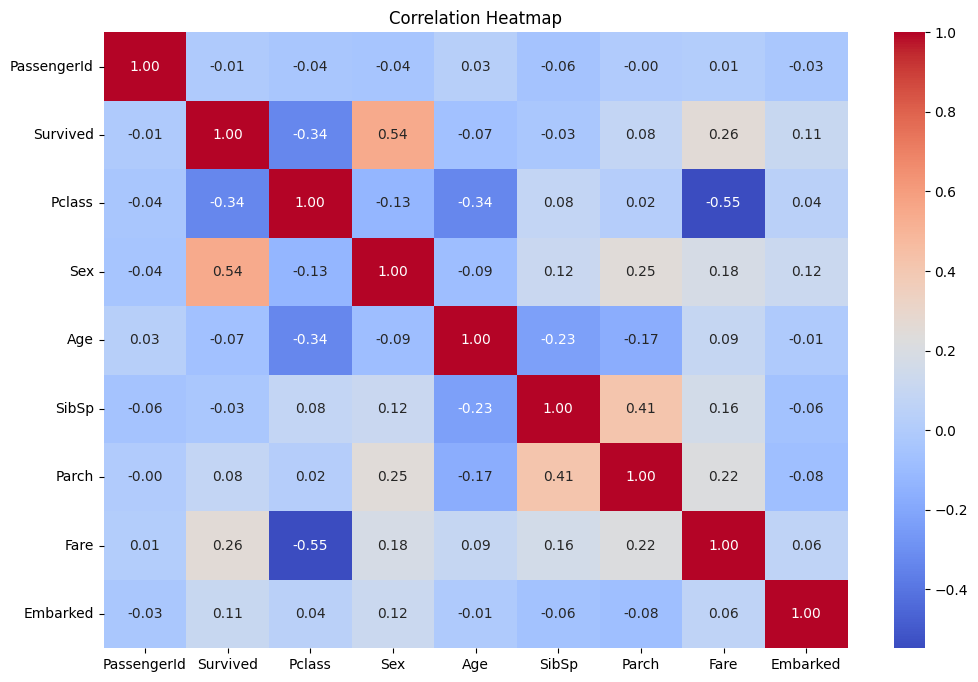

In [ ]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**interactive histograms using plotly library**

In [ ]:
# Interactive bar chart for gender distribution
fig = px.bar(df, x='Sex', title='Gender Distribution', labels={'Sex': 'Gender', 'count': 'Count'}, template='plotly_dark')
fig.show()

# Interactive histogram for age distribution
fig = px.histogram(df, x='Age', nbins=30, title='Age Distribution', labels={'Age': 'Age', 'count': 'Count'}, template='plotly_dark')
fig.show()

# Interactive scatter plot for age vs fare with survival status
fig = px.scatter(df, x='Age', y='Fare', color='Survived', hover_data=['Name', 'Pclass'], title='Age vs Fare by Survival', labels={'Age': 'Age', 'Fare': 'Fare', 'Survived': 'Survived'}, template='plotly_dark')
fig.show()

# Interactive box plot for fare distribution by passenger class
fig = px.box(df, x='Pclass', y='Fare', title='Fare Distribution by Passenger Class', labels={'Pclass': 'Passenger Class', 'Fare': 'Fare'}, template='plotly_dark')
fig.show()

# Interactive correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    text=correlation_matrix.values,
    hoverinfo='text'
))
fig.update_layout(title='Correlation Heatmap', xaxis_nticks=36, template='plotly_dark')
fig.show()
